In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.pyplot import text
from glob import glob
import seaborn as sns
import MDAnalysis as mda
from MDAnalysis import Universe
from MDAnalysis.analysis import align
from MDAnalysis.analysis import rms
from numpy.linalg import norm
from scipy.stats import ttest_ind
from statannotations.Annotator import Annotator

In [3]:
def get_dfdist(sel1, sel2, u):
    
    prot1 = u.select_atoms(sel1)
    prot2 = u.select_atoms(sel2)
    distlist = []
    for ts in u.trajectory:
        com1 = prot1.center_of_mass()
        com2 = prot2.center_of_mass()
        dist = norm(com1 - com2)
        distlist.append(dist)
        
    return distlist
    

In [10]:
wtpipu = Universe(wtpipgro, [wtpipxtc1, wtpipxtc2, wtpipxtc3])
wtnopipu = Universe(wtnopipgro, [wtnopipxtc1, wtnopipxtc2, wtnopipxtc3])

phesc = "resid 1311 and name BB SC1 SC2 SC3 SC4"
ifmbs = "resid 1153 1485 1591 and name BB SC1 SC2 SC3 SC4" # L1153 DIII_S4-S5 I1485 DIV-S5 N1591 DIV-S6
dists_wtpip = get_dfdist(phesc, ifmbs, wtpipu)
dists_wtnopip = get_dfdist(phesc, ifmbs, wtnopipu)

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:80: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:80: UserWarning: Failed to guess the mass for the following atom types: G
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/topology/base.py:203: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details

Text(0.5, 0, 'Distance (A)')

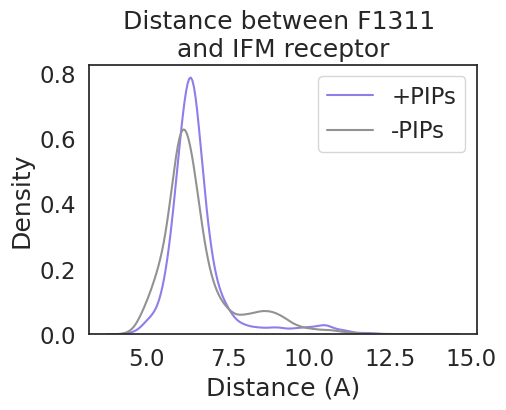

In [11]:
pal = ["#8E7EEA", 
       "#929292"
      ]

fig, ax = plt.subplots(1,1, figsize=(5,3.5
                                    ))
sns.set(font_scale=1.5)
sns.set_style("white")
sns.kdeplot(dists_wtpip, label="+PIPs", color=pal[0])
sns.kdeplot(dists_wtnopip, label="-PIPs", color=pal[1])
plt.legend()
plt.title("Distance between F1311 \nand IFM receptor")
plt.xlabel("Distance (A)")


In [12]:
iqmpipu = Universe(iqmpipgro, [iqmpipxtc1, iqmpipxtc2, iqmpipxtc3])
iqmnopipu = Universe(iqmnopipgro, [iqmnopipxtc1, iqmnopipxtc2, iqmnopipxtc3])

phesc = "resid 1311 and name BB SC1 SC2 SC3 SC4"
ifmbs = "resid 1153 1485 1591 and name BB SC1 SC2 SC3 SC4" # L1153 DIII_S4-S5 I1485 DIV-S5 N1591 DIV-S6
dists_iqmpip = get_dfdist(phesc, ifmbs, iqmpipu)
dists_iqmnopip = get_dfdist(phesc, ifmbs, iqmnopipu)


/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:80: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:80: UserWarning: Failed to guess the mass for the following atom types: G
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/topology/base.py:203: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details

(0.0, 0.26)

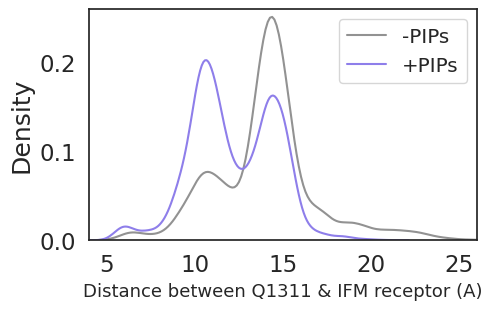

In [13]:
fig, ax = plt.subplots(1,1, figsize=(5,3
                                    ))
sns.set(font_scale=1.3)
sns.set_style("white")
sns.kdeplot(dists_iqmnopip, label="-PIPs", color=pal[1])#, linewidth=5)
sns.kdeplot(dists_iqmpip, label="+PIPs", color=pal[0])#, linewidth=5)
plt.legend()
plt.xlabel("Distance between Q1311 & IFM receptor (A)", fontsize=13)
plt.xlim(4,26)
plt.ylim(0, 0.26)
